# **Exoplanet Scatterplots**

In [5]:
# Importing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [6]:
filtered_exoplanets = pd.read_csv('filtered_exoplanet_dataset_removed_outliers.csv')

In [7]:
filtered_exoplanets[filtered_exoplanets['planet_name'] == 'Kepler-452 b']

,planet_name,host_star_name,orbital_period_day,orbit_semi_major_axis_au,planet_rad_earth_rad,planet_rad_jup_rad,planet_mass_earth_mass,planet_mass_jup_mass,Eccentricity,planet_equil_temp_k,spectral_type,stellar_effective_temp_k,stellar_rad_solar_rad,stellar_mass_solar_mass,distance_parsec,stellar_surf_grav,declination_deg,discovery_method
3999,Kepler-452 b,Kepler-452,384.844831,1.009733,1.3722,0.138,NaN,NaN,0.0,235.0,G2,5687.166667,0.998333,0.97,551.727,4.446,44.277586,Transit


In [8]:
filtered_exoplanets.columns

Index(['planet_name', 'host_star_name', 'orbital_period_day',
       'orbit_semi_major_axis_au', 'planet_rad_earth_rad',
       'planet_rad_jup_rad', 'planet_mass_earth_mass', 'planet_mass_jup_mass',
       'Eccentricity', 'planet_equil_temp_k', 'spectral_type',
       'stellar_effective_temp_k', 'stellar_rad_solar_rad',
       'stellar_mass_solar_mass', 'distance_parsec', 'stellar_surf_grav',
       'declination_deg', 'discovery_method'],
      dtype='object')

/var/folders/0h/xv76v4pj3ss4qdmz4fmbn6fw0000gn/T/ipykernel_31322/1973325407.py:57: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1000)


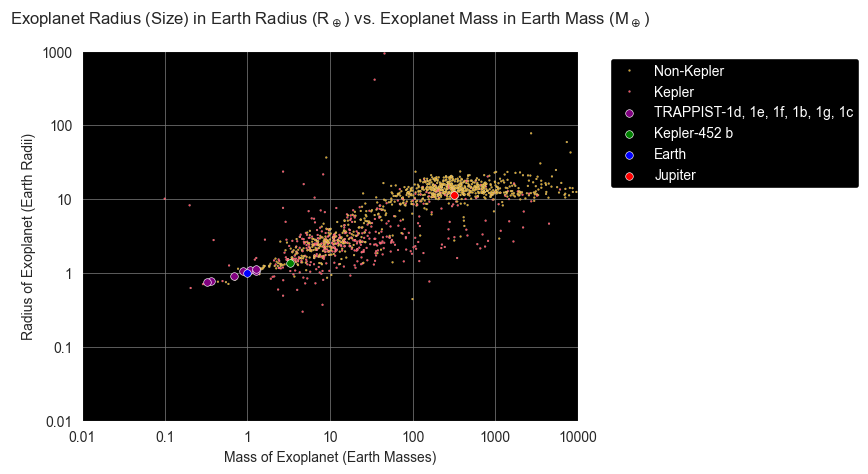

In [9]:
# Sample data for Earth and Jupiter
earth = pd.DataFrame({
    'planet_name': ['Earth'],
    'planet_mass_earth_mass': [1],
    'planet_rad_earth_rad': [1],
    'Kepler Planet': ['Non-Kepler']
})

jupiter = pd.DataFrame({
    'planet_name': ['Jupiter'],
    'planet_mass_earth_mass': [317.8],
    'planet_rad_earth_rad': [11.2],
    'Kepler Planet': ['Non-Kepler']
})

# Combine the highlighted points DataFrame with the original DataFrame
combined_data = pd.concat([filtered_exoplanets, earth, jupiter], ignore_index=True)


# Function to determine if a planet is Kepler or not
def is_kepler(planet_name):
    return 'Kepler' if 'Kepler' in planet_name or 'K2' in planet_name else 'Non-Kepler'

# Create a new column 'Kepler Planet' based on the 'planet_name' column
filtered_exoplanets['Kepler Planet'] = filtered_exoplanets['planet_name'].apply(is_kepler)

# Define colors for Kepler and non-Kepler planets
colors = {'Kepler': '#FD4659', 'Non-Kepler': 'goldenrod'}

sns.set_style("darkgrid", {"axes.facecolor": "black"})


# Scatter Plot: Exoplanet Radius (Size) in Earth Radius vs. Exoplanet Mass in Earth Mass
sns.scatterplot(data=filtered_exoplanets, x='planet_mass_earth_mass', y='planet_rad_earth_rad', hue='Kepler Planet', palette=colors, s=2)
plt.xlabel('Mass of Exoplanet (Earth Masses)')
plt.ylabel('Radius of Exoplanet (Earth Radii)')
plt.title('Exoplanet Radius (Size) in Earth Radius (R$_\oplus$) vs. Exoplanet Mass in Earth Mass (M$_\oplus$)', pad=20)

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Customize tick label format
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set major ticks for the x-axis
plt.xticks([0.01, 0.1, 1, 10, 100, 1000, 10000], ['0.01', '0.1', '1', '10', '100', '1000', '10000'])

# Set major ticks for the y-axis
plt.yticks([0.01, 0.1, 1, 10, 100, 1000], ['0.01', '0.1', '1', '10', '100', '1000'])

# Set x-axis limits to ensure tick marks are spread evenly
plt.xlim(0.01, 10000)

# Set y-axis limits to ensure tick marks are spread evenly
plt.ylim(0, 1000)

# Highlight TRAPPIST points
highlighted_trappist= filtered_exoplanets[filtered_exoplanets['planet_name'].str.contains('TRAPPIST')]  
sns.scatterplot(data=highlighted_trappist, x='planet_mass_earth_mass', y='planet_rad_earth_rad', color='purple', s=30, label='TRAPPIST-1d, 1e, 1f, 1b, 1g, 1c')

# Manually set the mass of Kepler-452 b
kepler452b_mass = 3.29  # Earth masses
filtered_exoplanets.loc[filtered_exoplanets['planet_name'] == 'Kepler-452 b', 'planet_mass_earth_mass'] = kepler452b_mass

# Highlight specific point for Kepler-452 b
highlighted_kepler452b = filtered_exoplanets[filtered_exoplanets['planet_name'] == 'Kepler-452 b']
sns.scatterplot(data=highlighted_kepler452b, x='planet_mass_earth_mass', y='planet_rad_earth_rad', color='green', s=30, label='Kepler-452 b')

# Highlight specific points for Earth and Jupiter
sns.scatterplot(data=earth, x='planet_mass_earth_mass', y='planet_rad_earth_rad', color='blue', s=30, label='Earth')
sns.scatterplot(data=jupiter, x='planet_mass_earth_mass', y='planet_rad_earth_rad', color='red', s=30, label='Jupiter')

# Change the grid color to be more visible on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1))
for text in legend.get_texts():
    text.set_color('white')


plt.show()


/var/folders/0h/xv76v4pj3ss4qdmz4fmbn6fw0000gn/T/ipykernel_31322/2798697931.py:55: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10000000)


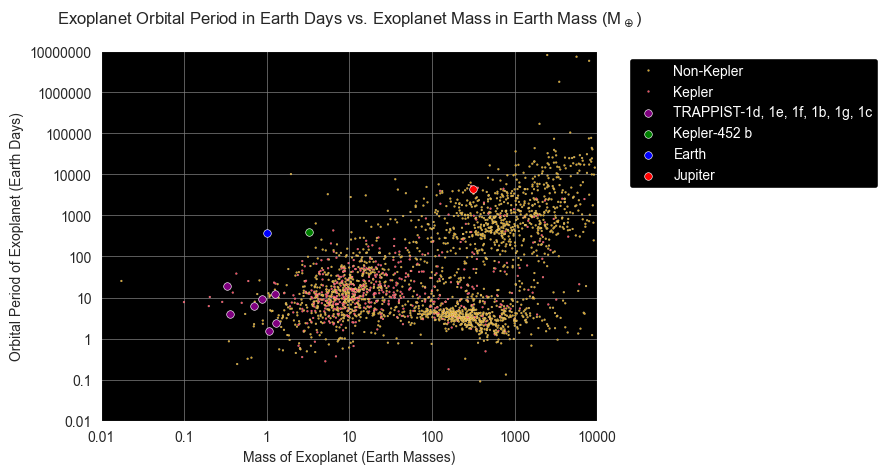

In [10]:
# Sample data for Earth and Jupiter (assuming data points)
earth = pd.DataFrame({
    'planet_name': ['Earth'],
    'planet_mass_earth_mass': [1],
    'orbital_period_day': [365], 
    'Kepler Planet': ['Non-Kepler']
})

jupiter = pd.DataFrame({
    'planet_name': ['Jupiter'],
    'planet_mass_earth_mass': [317.8],
    'orbital_period_day': [4332.59],  # Assuming Jupiter's orbital period is 4332.59 days
    'Kepler Planet': ['Non-Kepler']
})

# Combine the highlighted points DataFrame with the original DataFrame
combined_data = pd.concat([filtered_exoplanets, earth, jupiter], ignore_index=True)

# Function to determine if a planet is Kepler or not
def is_kepler(planet_name):
    return 'Kepler' if 'Kepler' in planet_name or 'K2' in planet_name else 'Non-Kepler'

# Create a new column 'Kepler Planet' based on the 'planet_name' column
filtered_exoplanets['Kepler Planet'] = filtered_exoplanets['planet_name'].apply(is_kepler)

# Define colors for Kepler and non-Kepler planets
colors = {'Kepler': '#FD4659', 'Non-Kepler': 'goldenrod'}

sns.set_style("darkgrid", {"axes.facecolor": "black"})

# Scatter Plot: Exoplanet Orbital Period (in Earth Days) vs. Exoplanet Mass (in Earth Mass)
sns.scatterplot(data=filtered_exoplanets, x='planet_mass_earth_mass', y='orbital_period_day', hue='Kepler Planet', palette=colors, s=2)
plt.xlabel('Mass of Exoplanet (Earth Masses)')
plt.ylabel('Orbital Period of Exoplanet (Earth Days)')
plt.title('Exoplanet Orbital Period in Earth Days vs. Exoplanet Mass in Earth Mass (M$_\oplus$)', pad=20)

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Customize tick label format
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set major ticks for the x-axis
plt.xticks([0.01, 0.1, 1, 10, 100, 1000, 10000], ['0.01', '0.1', '1', '10', '100', '1000', '10000'])

# Set major ticks for the y-axis
plt.yticks([0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000], ['0.01', '0.1', '1', '10', '100', '1000', '10000', '100000', '1000000', '10000000'])

# Set x-axis limits to ensure tick marks are spread evenly
plt.xlim(0.01, 10000)

# Set y-axis limits to ensure tick marks are spread evenly
plt.ylim(0, 10000000)



# Highlight TRAPPIST points
highlighted_trappist= filtered_exoplanets[filtered_exoplanets['planet_name'].str.contains('TRAPPIST')]  
sns.scatterplot(data=highlighted_trappist, x='planet_mass_earth_mass', y='orbital_period_day', color='purple', s=30, label='TRAPPIST-1d, 1e, 1f, 1b, 1g, 1c')

# Highlight specific point for Kepler-452 b
highlighted_kepler452b = filtered_exoplanets[filtered_exoplanets['planet_name'] == 'Kepler-452 b']
sns.scatterplot(data=highlighted_kepler452b, x='planet_mass_earth_mass', y='orbital_period_day', color='green', s=30, label='Kepler-452 b')


# Highlight specific points for Earth and Jupiter
sns.scatterplot(data=earth, x='planet_mass_earth_mass', y='orbital_period_day', color='blue', s=30, label='Earth')
sns.scatterplot(data=jupiter, x='planet_mass_earth_mass', y='orbital_period_day', color='red', s=30, label='Jupiter')

# Change the grid color to be more visible on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1))
for text in legend.get_texts():
    text.set_color('white')

plt.show()


/var/folders/0h/xv76v4pj3ss4qdmz4fmbn6fw0000gn/T/ipykernel_31322/238890376.py:53: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10000)


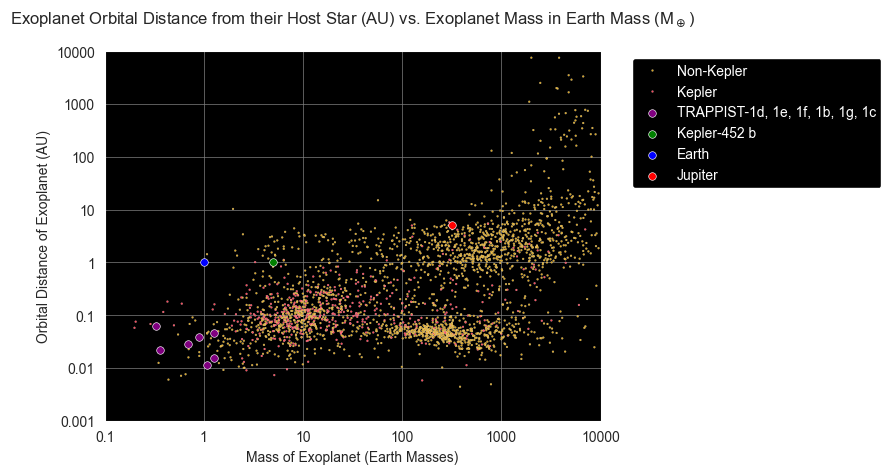

In [11]:
# Sample data for Jupiter (assuming data points)
jupiter = pd.DataFrame({
    'planet_name': ['Jupiter'],
    'planet_mass_earth_mass': [317.8],  # Jupiter's mass in Earth masses
    'orbit_semi_major_axis_au': [5.2], 
})

earth = pd.DataFrame({
    'planet_name': ['Earth'],
    'planet_mass_earth_mass': [1],
    'orbit_semi_major_axis_au': [1]
})

# Combine the highlighted points DataFrame with the original DataFrame
combined_data = pd.concat([filtered_exoplanets, jupiter, earth], ignore_index=True)

# Function to determine if a planet is Kepler or not
def is_kepler(planet_name):
    return 'Kepler' if 'Kepler' in planet_name or 'K2' in planet_name else 'Non-Kepler'

# Create a new column 'Kepler Planet' based on the 'planet_name' column
filtered_exoplanets['Kepler Planet'] = filtered_exoplanets['planet_name'].apply(is_kepler)

# Define colors for Kepler and non-Kepler planets
colors = {'Kepler': '#FD4659', 'Non-Kepler': 'goldenrod'}

sns.set_style("darkgrid", {"axes.facecolor": "black"})

# Scatter Plot: Exoplanet Orbital Distance (in AU) vs. Exoplanet Mass (in Earth Mass)
sns.scatterplot(data=filtered_exoplanets, x='planet_mass_earth_mass', y='orbit_semi_major_axis_au', hue='Kepler Planet', palette=colors, s=2)
plt.xlabel('Mass of Exoplanet (Earth Masses)')
plt.ylabel('Orbital Distance of Exoplanet (AU)')
plt.title('Exoplanet Orbital Distance from their Host Star (AU) vs. Exoplanet Mass in Earth Mass (M$_\oplus$)', pad=20)

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Customize tick label format
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set major ticks for the x-axis
plt.xticks([0.01, 0.1, 1, 10, 100, 1000, 10000], ['0.01', '0.1', '1', '10', '100', '1000', '10000'])

# Set major ticks for the y-axis
plt.yticks([0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], ['0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000'])

# Set x-axis limits to ensure tick marks are spread evenly
plt.xlim(0.1, 10000)

# Set y-axis limits to ensure tick marks are spread evenly
plt.ylim(0, 10000)

# Highlight TRAPPIST points
highlighted_trappist = filtered_exoplanets[filtered_exoplanets['planet_name'].str.contains('TRAPPIST')]  
sns.scatterplot(data=highlighted_trappist, x='planet_mass_earth_mass', y='orbit_semi_major_axis_au', color='purple', s=30, label='TRAPPIST-1d, 1e, 1f, 1b, 1g, 1c')

# Manually set the Earth mass of Kepler-452 b
kepler452b_mass = 5  # Earth masses (example value, adjust as needed)
filtered_exoplanets.loc[filtered_exoplanets['planet_name'] == 'Kepler-452 b', 'planet_mass_earth_mass'] = kepler452b_mass

# Highlight specific point for Kepler-452 b
highlighted_kepler452b = filtered_exoplanets[filtered_exoplanets['planet_name'] == 'Kepler-452 b']
sns.scatterplot(data=highlighted_kepler452b, x='planet_mass_earth_mass', y='orbit_semi_major_axis_au', color='green', s=30, label='Kepler-452 b')

# Highlight specific points for Earth and Jupiter
sns.scatterplot(data=earth, x='planet_mass_earth_mass', y='orbit_semi_major_axis_au', color='blue', s=30, label='Earth')
sns.scatterplot(data=jupiter, x='planet_mass_earth_mass', y='orbit_semi_major_axis_au', color='red', s=30, label='Jupiter')

# Change the grid color to be more visible on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1))
for text in legend.get_texts():
    text.set_color('white')

plt.show()


/var/folders/0h/xv76v4pj3ss4qdmz4fmbn6fw0000gn/T/ipykernel_31322/1221439097.py:54: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1000)


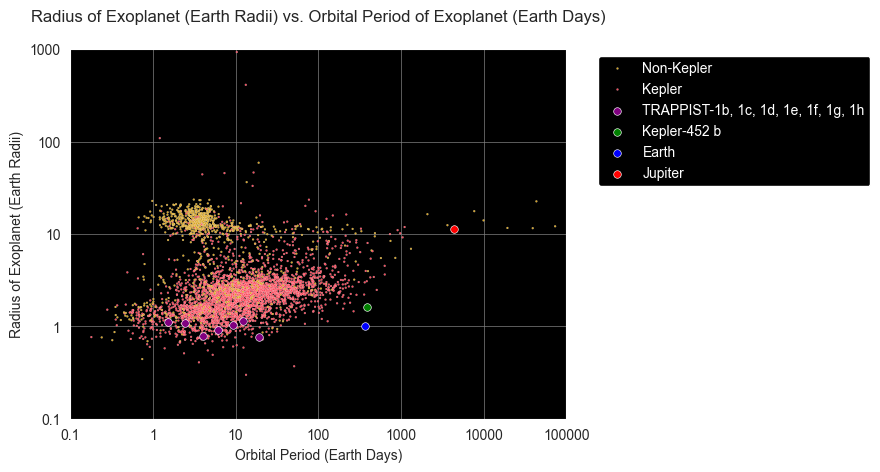

In [55]:
# Sample data for Jupiter (assuming data points)
jupiter = pd.DataFrame({
    'planet_name': ['Jupiter'],
    'planet_rad_earth_rad': [11.2],  # Jupiter's radius in Earth radii
    'orbital_period_day': [4332.59], 
})

earth = pd.DataFrame({
    'planet_name': ['Earth'],
    'planet_rad_earth_rad': [1],
    'orbital_period_day': [365]
})

# Combine the highlighted points DataFrame with the original DataFrame
combined_data = pd.concat([filtered_exoplanets, jupiter, earth], ignore_index=True)

# Function to determine if a planet is Kepler or not
def is_kepler(planet_name):
    return 'Kepler' if 'Kepler' in planet_name or 'K2' in planet_name else 'Non-Kepler'

# Create a new column 'Kepler Planet' based on the 'planet_name' column
filtered_exoplanets['Kepler Planet'] = filtered_exoplanets['planet_name'].apply(is_kepler)

# Define colors for Kepler and non-Kepler planets
colors = {'Kepler': '#FD4659', 'Non-Kepler': 'goldenrod'}

sns.set_style("darkgrid", {"axes.facecolor": "black"})

# Scatter Plot: Exoplanet Orbital Period (in Earth Days) vs. Exoplanet Radius (in Earth Radii)
sns.scatterplot(data=filtered_exoplanets, x='orbital_period_day', y='planet_rad_earth_rad', hue='Kepler Planet', palette=colors, s=2)
plt.xlabel('Orbital Period (Earth Days)')
plt.ylabel('Radius of Exoplanet (Earth Radii)')
plt.title('Radius of Exoplanet (Earth Radii) vs. Orbital Period of Exoplanet (Earth Days)', pad=20)

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Customize tick label format
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())


# Set major ticks for the x-axis
plt.xticks([0.1, 1, 10, 100, 1000, 10000, 100000, 1000000], ['0.1', '1', '10', '100', '1000', '10000', '100000', '1000000'])

# Set major ticks for the y-axis
plt.yticks([0.1, 1, 10, 100, 1000], ['0.1', '1', '10', '100', '1000'])

# Set x-axis limits to ensure tick marks are spread evenly
plt.xlim(0.1, 100000)

# Set y-axis limits to ensure tick marks are spread evenly
plt.ylim(0, 1000)

# Highlight TRAPPIST points
highlighted_trappist = filtered_exoplanets[filtered_exoplanets['planet_name'].str.contains('TRAPPIST')]  
sns.scatterplot(data=highlighted_trappist, x='orbital_period_day', y='planet_rad_earth_rad', color='purple', s=30, label='TRAPPIST-1b, 1c, 1d, 1e, 1f, 1g, 1h')

# Manually set the Earth radius and orbital period of Kepler-452 b
kepler452b_radius = 1.6  
kepler452b_period = 384.843  
filtered_exoplanets.loc[filtered_exoplanets['planet_name'] == 'Kepler-452 b', 'planet_rad_earth_rad'] = kepler452b_radius
filtered_exoplanets.loc[filtered_exoplanets['planet_name'] == 'Kepler-452 b', 'orbital_period_day'] = kepler452b_period

# Highlight specific point for Kepler-452 b
highlighted_kepler452b = filtered_exoplanets[filtered_exoplanets['planet_name'] == 'Kepler-452 b']
sns.scatterplot(data=highlighted_kepler452b, x='orbital_period_day', y='planet_rad_earth_rad', color='green', s=30, label='Kepler-452 b')

# Highlight specific points for Earth and Jupiter
sns.scatterplot(data=earth, x='orbital_period_day', y='planet_rad_earth_rad', color='blue', s=30, label='Earth')
sns.scatterplot(data=jupiter, x='orbital_period_day', y='planet_rad_earth_rad', color='red', s=30, label='Jupiter')

# Change the grid color to be more visible on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
for text in legend.get_texts():
    text.set_color('white')


plt.show()


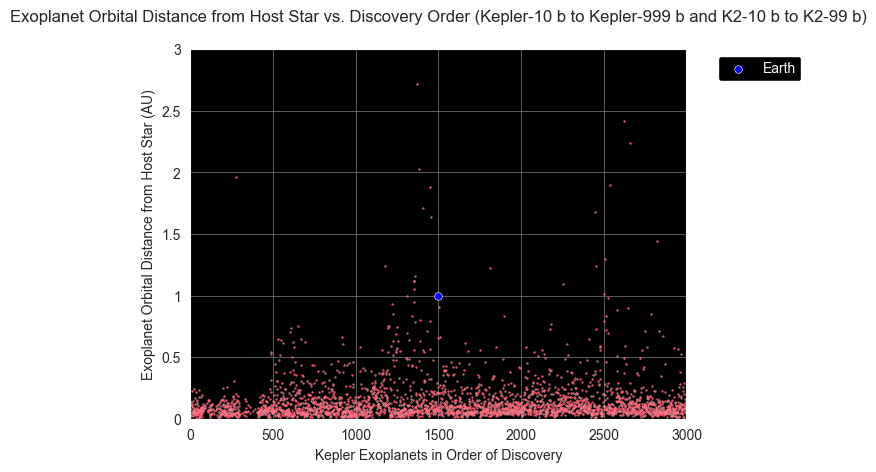

In [113]:
#Exoplanet Distance from their Host Star (AU) vs. All Kepler Exoplanets in order of discovery (Kepler-10 b to Kepler-999 b and K2-10 b to k2-99 b)

#From the start of the Kepler planet range - end

#Both Kepler () to Kepler () and K2 () to K2 () 

# Sample data for Earth
earth = pd.DataFrame({
    'planet_name': ['Earth'],
    'orbit_semi_major_axis_au': [1],  # Earth's orbital distance in AU
    'discovery_order': [1500],  # Arbitrary value for plotting Earth in discovery order
})

# Combine the highlighted points DataFrame with the original DataFrame
kepler_exoplanets = filtered_exoplanets[
    filtered_exoplanets['planet_name'].str.startswith('Kepler-') | 
    filtered_exoplanets['planet_name'].str.startswith('K2-')
].copy()

# Adding discovery order for sorting
kepler_exoplanets['discovery_order'] = range(1, len(kepler_exoplanets) + 1)

combined_data = pd.concat([kepler_exoplanets, earth], ignore_index=True)

sns.set_style("darkgrid", {"axes.facecolor": "black"})

# Scatter Plot: Exoplanet Orbital Distance from Host Star vs. Discovery Order
sns.scatterplot(data=combined_data, x='discovery_order', y='orbit_semi_major_axis_au', color='#FD4659', s=2)
plt.xlabel('Kepler Exoplanets in Order of Discovery')
plt.ylabel('Exoplanet Orbital Distance from Host Star (AU)')
plt.title('Exoplanet Orbital Distance from Host Star vs. Discovery Order (Kepler-10 b to Kepler-999 b and K2-10 b to K2-99 b)', pad=20)

# Set fixed x-axis limits
plt.xlim(0, 3000)

# Set fixed y-axis limits
plt.ylim(0, 3)

# Customize tick label format
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set major ticks for the y-axis
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3], ['0', '0.5', '1', '1.5', '2', '2.5', '3'])

# Highlight specific point for Earth
sns.scatterplot(data=earth, x='discovery_order', y='orbit_semi_major_axis_au', color='blue', edgecolor='white', s=30, label='Earth')

# Change the grid color to be more visible on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend to show only Earth
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
for text in legend.get_texts():
    text.set_color('white')

plt.show()

In [137]:
# Scatter Plot: Exoplanet Distance from Host Stars vs. All Exoplanets

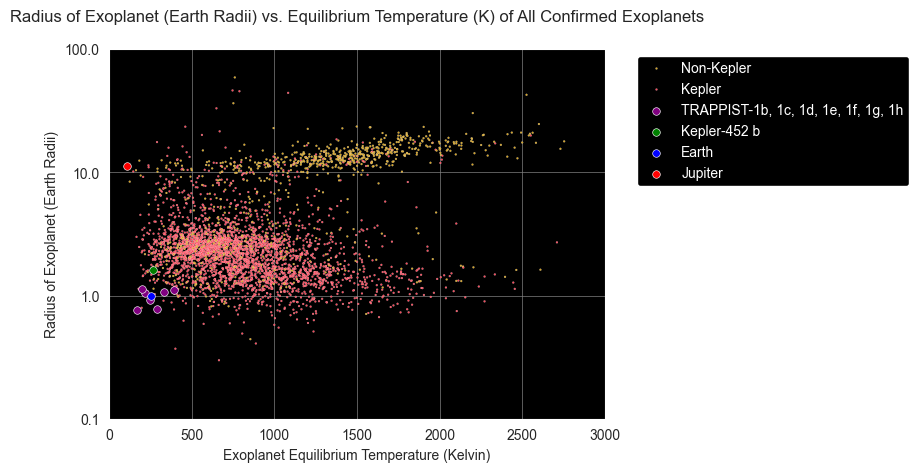

In [62]:
# Sample data for Earth and Jupiter
earth = pd.DataFrame({
    'planet_name': ['Earth'],
    'planet_rad_earth_rad': [1],
    'planet_equil_temp_k': [255]  
})

jupiter = pd.DataFrame({
    'planet_name': ['Jupiter'],
    'planet_rad_earth_rad': [11.2],  
    'planet_equil_temp_k': [110]  
})

# Group the data by planet name and take the mean of duplicate values for numeric columns
grouped_data = filtered_exoplanets.groupby('planet_name').agg({
    'planet_rad_earth_rad': 'mean',
    'planet_equil_temp_k': 'mean',
    'Kepler Planet': 'first' 
}).reset_index()

# Scatter Plot: Exoplanet Equilibrium Temperature (in Kelvin) vs. Exoplanet Radius (in Earth Radii)
sns.scatterplot(data=grouped_data, x='planet_equil_temp_k', y='planet_rad_earth_rad', hue='Kepler Planet', palette=colors, s=2)
plt.xlabel('Exoplanet Equilibrium Temperature (Kelvin)')
plt.ylabel('Radius of Exoplanet (Earth Radii)')
plt.title('Radius of Exoplanet (Earth Radii) vs. Equilibrium Temperature (K) of All Confirmed Exoplanets', pad=20)

# Set fixed x-axis limits
plt.xlim(0, 3000)

# Set logarithmic scale for y-axis
plt.yscale('log')

# Set y-axis limits
plt.ylim(0.1, 100)

# Customize tick label format
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Highlight TRAPPIST points
highlighted_trappist = grouped_data[grouped_data['planet_name'].str.contains('TRAPPIST')]  
sns.scatterplot(data=highlighted_trappist, x='planet_equil_temp_k', y='planet_rad_earth_rad', color='purple', edgecolor='white', s=30, label='TRAPPIST-1b, 1c, 1d, 1e, 1f, 1g, 1h')

# Highlight specific point for Kepler-452
kepler452b_temp = 265  
kepler452b_radius = 1.6 
sns.scatterplot(x=[kepler452b_temp], y=[kepler452b_radius], color='green', edgecolor='white', s=30, label='Kepler-452 b')

# Highlight specific points for Earth and Jupiter
sns.scatterplot(data=earth, x='planet_equil_temp_k', y='planet_rad_earth_rad', color='blue', edgecolor='white', s=30, label='Earth')
sns.scatterplot(data=jupiter, x='planet_equil_temp_k', y='planet_rad_earth_rad', color='red', edgecolor='white', s=30, label='Jupiter')


# Change the grid color to be more visible on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
for text in legend.get_texts():
    text.set_color('white')

plt.show()


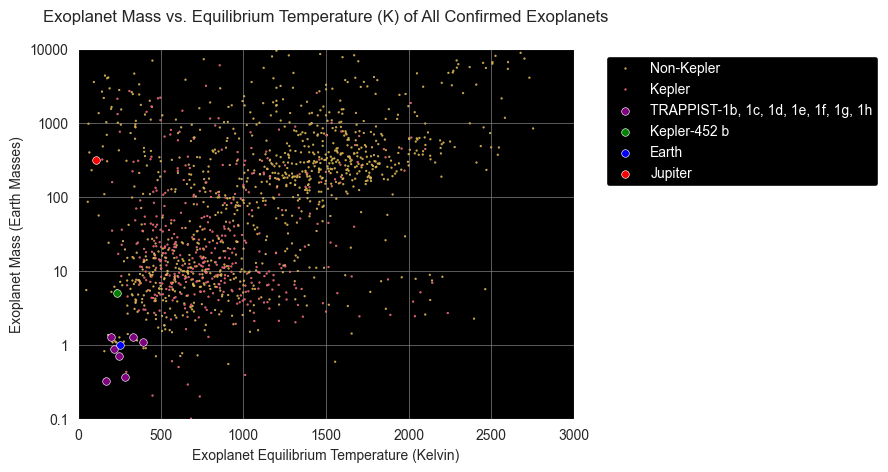

In [87]:
# Sample data for Jupiter and Earth
jupiter = pd.DataFrame({
    'planet_name': ['Jupiter'],
    'planet_mass_earth_mass': [317.8],  # Jupiter's mass in Earth masses
    'planet_equil_temp_k': [110],  # Example equilibrium temperature for Jupiter
    'Kepler Planet': ['Non-Kepler']
})

earth = pd.DataFrame({
    'planet_name': ['Earth'],
    'planet_mass_earth_mass': [1],
    'planet_equil_temp_k': [255],  # Example equilibrium temperature for Earth
    'Kepler Planet': ['Non-Kepler']
})

# Combine the highlighted points DataFrame with the original DataFrame
combined_data = pd.concat([filtered_exoplanets, jupiter, earth], ignore_index=True)

# Function to determine if a planet is Kepler or not
def is_kepler(planet_name):
    return 'Kepler' if 'Kepler' in planet_name or 'K2' in planet_name else 'Non-Kepler'

# Create a new column 'Kepler Planet' based on the 'planet_name' column
combined_data['Kepler Planet'] = combined_data['planet_name'].apply(is_kepler)

# Define colors for Kepler and non-Kepler planets
colors = {'Kepler': '#FD4659', 'Non-Kepler': 'goldenrod'}

sns.set_style("darkgrid", {"axes.facecolor": "black"})

# Scatter Plot: Exoplanet Mass vs. Equilibrium Temperature
sns.scatterplot(data=combined_data, x='planet_equil_temp_k', y='planet_mass_earth_mass', hue='Kepler Planet', palette=colors, s=2)
plt.xlabel('Exoplanet Equilibrium Temperature (Kelvin)')
plt.ylabel('Exoplanet Mass (Earth Masses)')
plt.title('Exoplanet Mass vs. Equilibrium Temperature (K) of All Confirmed Exoplanets' , pad=20)

# Set logarithmic scale for the y-axis
plt.yscale('log')


# Set fixed x-axis limits
plt.xlim(0, 3000)

# Set fixed y-axis limits
plt.ylim(0.1, 10000)

# Customize tick label format
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set major ticks for the y-axis
plt.yticks([0.1, 1, 10, 100, 1000, 10000], ['0.1', '1', '10', '100', '1000', '10000'])

# Highlight TRAPPIST points
highlighted_trappist = combined_data[combined_data['planet_name'].str.contains('TRAPPIST')]  
sns.scatterplot(data=highlighted_trappist, x='planet_equil_temp_k', y='planet_mass_earth_mass', color='purple', s=30, label='TRAPPIST-1b, 1c, 1d, 1e, 1f, 1g, 1h')

# Highlight specific point for Kepler-452 b
highlighted_kepler452b = combined_data[combined_data['planet_name'] == 'Kepler-452 b']
sns.scatterplot(data=highlighted_kepler452b.head(1), x='planet_equil_temp_k', y='planet_mass_earth_mass', color='green', edgecolor='white', s=30, label='Kepler-452 b')

# Highlight specific points for Earth and Jupiter
sns.scatterplot(data=earth, x='planet_equil_temp_k', y='planet_mass_earth_mass', color='blue', edgecolor='white', s=30, label='Earth')
sns.scatterplot(data=jupiter, x='planet_equil_temp_k', y='planet_mass_earth_mass', color='red', edgecolor='white', s=30, label='Jupiter')

# Change the grid color to be more visible on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
for text in legend.get_texts():
    text.set_color('white')

plt.show()

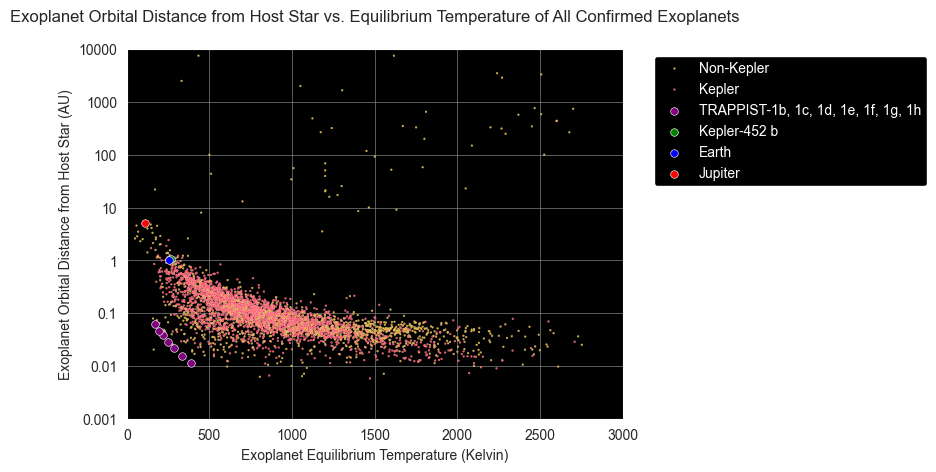

In [92]:
# Sample data for Jupiter and Earth
jupiter = pd.DataFrame({
    'planet_name': ['Jupiter'],
    'orbit_semi_major_axis_au': [5.2],  # Jupiter's orbital distance in AU
    'planet_equil_temp_k': [110],  
})

earth = pd.DataFrame({
    'planet_name': ['Earth'],
    'orbit_semi_major_axis_au': [1],  # Earth's orbital distance in AU
    'planet_equil_temp_k': [255],  
})

kepler452b = pd.DataFrame({
    'planet_name': ['Kepler-452 b'],
    'orbit_semi_major_axis_au': [1.046],  # Kepler-452 b's orbital distance in AU
    'planet_equil_temp_k': [265],  # Kepler-452 b's equilibrium temperature
})

# Combine the highlighted points DataFrame with the original DataFrame
combined_data = pd.concat([filtered_exoplanets, jupiter, earth], ignore_index=True)

# Function to determine if a planet is Kepler or not
def is_kepler(planet_name):
    return 'Kepler' if 'Kepler' in planet_name or 'K2' in planet_name else 'Non-Kepler'

# Create a new column 'Kepler Planet' based on the 'planet_name' column
combined_data['Kepler Planet'] = combined_data['planet_name'].apply(is_kepler)

# Define colors for Kepler and non-Kepler planets
colors = {'Kepler': '#FD4659', 'Non-Kepler': 'goldenrod'}

sns.set_style("darkgrid", {"axes.facecolor": "black"})

# Scatter Plot: Exoplanet Orbital Distance vs. Equilibrium Temperature
sns.scatterplot(data=combined_data, x='planet_equil_temp_k', y='orbit_semi_major_axis_au', hue='Kepler Planet', palette=colors, s=2)
plt.xlabel('Exoplanet Equilibrium Temperature (Kelvin)')
plt.ylabel('Exoplanet Orbital Distance from Host Star (AU)')
plt.title('Exoplanet Orbital Distance from Host Star vs. Equilibrium Temperature of All Confirmed Exoplanets', pad=20)

# Set logarithmic scale for the y-axis
plt.yscale('log')

# Set fixed x-axis limits
plt.xlim(0, 3000)

# Customize tick label format
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set major ticks for the y-axis
plt.yticks([0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], ['0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000'])

plt.ylim(0.001, 10000)

# Highlight TRAPPIST points
highlighted_trappist = combined_data[combined_data['planet_name'].str.contains('TRAPPIST')]  
sns.scatterplot(data=highlighted_trappist, x='planet_equil_temp_k', y='orbit_semi_major_axis_au', color='purple', s=30, label='TRAPPIST-1b, 1c, 1d, 1e, 1f, 1g, 1h')

# Highlight specific points for Earth, Jupiter, and Kepler-452 b
sns.scatterplot(data=kepler452b, x='planet_equil_temp_k', y='orbit_semi_major_axis_au', color='green', edgecolor='white', s=30, label='Kepler-452 b')
sns.scatterplot(data=earth, x='planet_equil_temp_k', y='orbit_semi_major_axis_au', color='blue', edgecolor='white', s=30, label='Earth')
sns.scatterplot(data=jupiter, x='planet_equil_temp_k', y='orbit_semi_major_axis_au', color='red', edgecolor='white', s=30, label='Jupiter')


# Change the grid color to be more visible on black background
plt.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust the legend
legend = plt.legend(facecolor='black', edgecolor='white', framealpha=1, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
for text in legend.get_texts():
    text.set_color('white')

plt.show()
